In [1]:
import glob
import pandas as pd

catfs = glob.glob("train/cat.*.jpg")
catt = [0] * len(catfs)
dogfs = glob.glob("train/dog.*.jpg")
dogt = [1] * len(dogfs)

df = pd.DataFrame({
    "path":catfs + dogfs, # catfs and dogs are lists
    "ans": catt + dogt
    
})

df

,path,ans
0,train\cat.0.jpg,0
1,train\cat.1.jpg,0
2,train\cat.10.jpg,0
3,train\cat.100.jpg,0
4,train\cat.1000.jpg,0
...,...,...
24995,train\dog.9995.jpg,1
24996,train\dog.9996.jpg,1
24997,train\dog.9997.jpg,1
24998,train\dog.9998.jpg,1


In [2]:
from keras.applications.vgg16 import VGG16
vgg = VGG16(include_top = False,
      input_shape = (224, 224, 3)
     )
vgg.summary()

Using TensorFlow backend.
W0102 14:41:21.230320 14676 module_wrapper.py:139] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0102 14:41:21.244280 14676 module_wrapper.py:139] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0102 14:41:21.257247 14676 module_wrapper.py:139] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0102 14:41:21.342022 14676 module_wrapper.py:139] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0102 14:41:22.233634 14676 module_wrapper.py

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [3]:
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten

from keras.layers import BatchNormalization
x = BatchNormalization()(vgg.output)

# MLP
# trainable: before compile
for l in vgg.layers:
    l.trainable = False # cannot be trained again

x = Flatten()(x)
x = Dense(512, activation = "relu")(x)
x = Dropout(0.25)(x)
out = Dense(2, activation = "softmax")(x)
model = Model(inputs = vgg.input, outputs = out)
model.summary()

W0102 14:41:26.153151 14676 module_wrapper.py:139] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0102 14:41:26.274823 14676 module_wrapper.py:139] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0102 14:41:26.344635 14676 deprecation.py:506] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [4]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

W0102 14:41:26.463325 14676 module_wrapper.py:139] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0102 14:41:26.499222 14676 module_wrapper.py:139] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [5]:
import numpy as np
from keras.preprocessing.image import load_img
from keras.applications.vgg16 import preprocess_input

p = df.iloc[0]["path"]
img = load_img(p, target_size = (224, 224)).convert("RGB")
img_np = np.array(img)
img_pre = preprocess_input(img_np)
img_pre

array([[[ -16.939003 ,   47.221    ,   79.32     ],
        [ -13.939003 ,   50.221    ,   82.32     ],
        [ -10.939003 ,   53.221    ,   85.32     ],
        ...,
        [  15.060997 ,   86.221    ,  121.32     ],
        [  19.060997 ,   85.221    ,  117.32     ],
        [  17.060997 ,   83.221    ,  115.32     ]],

       [[ -16.939003 ,   47.221    ,   79.32     ],
        [ -13.939003 ,   50.221    ,   82.32     ],
        [ -10.939003 ,   53.221    ,   85.32     ],
        ...,
        [  16.060997 ,   88.221    ,  121.32     ],
        [  20.060997 ,   86.221    ,  118.32     ],
        [  18.060997 ,   84.221    ,  116.32     ]],

       [[ -16.939003 ,   47.221    ,   79.32     ],
        [ -13.939003 ,   50.221    ,   82.32     ],
        [ -10.939003 ,   53.221    ,   85.32     ],
        ...,
        [  18.060997 ,   87.221    ,  121.32     ],
        [  21.060997 ,   87.221    ,  119.32     ],
        [  19.060997 ,   85.221    ,  117.32     ]],

       ...,

      

In [6]:
def preprocess(path):
    img = load_img(path, target_size = (224, 224)).convert("RGB")
    img_np = np.array(img)
    img_pre = preprocess_input(img_np)
    return img_pre

def get_images(paths, targets, batch = 20):
    idx = np.random.randint(0, len(paths), batch)
    ps = paths[idx]
    xs = np.array(list(map(preprocess, ps)))
    ys = targets[idx]
    return (ps, xs, ys)

In [7]:
from sklearn.model_selection import train_test_split
x = np.array(df["path"])
y = np.array(df["ans"])
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size = 0.1)

In [8]:
for i in range(10):
    print("-" * 15, "Times:", i, "-" * 15)
    _, xs, ys = get_images(x_train, y_train)
    train_loss = model.train_on_batch(xs, ys)
    print("[Train]:", train_loss)

    _, xs, ys = get_images(x_test, y_test)
    val_loss = model.test_on_batch(xs, ys)
    print("[Validate]:", val_loss)

--------------- Times: 0 ---------------


W0102 14:41:28.195685 14676 deprecation.py:323] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0102 14:41:28.491903 14676 module_wrapper.py:139] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0102 14:41:28.766159 14676 module_wrapper.py:139] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



[Train]: [0.7980401, 0.55]
[Validate]: [5.5423427, 0.45]
--------------- Times: 1 ---------------
[Train]: [5.9717226, 0.5]
[Validate]: [3.8046703, 0.6]
--------------- Times: 2 ---------------
[Train]: [1.8913816, 0.7]
[Validate]: [0.16842793, 0.9]
--------------- Times: 3 ---------------
[Train]: [0.077066384, 0.95]
[Validate]: [0.0801477, 0.95]
--------------- Times: 4 ---------------
[Train]: [0.34798172, 0.9]
[Validate]: [0.9446047, 0.85]
--------------- Times: 5 ---------------
[Train]: [0.42777523, 0.85]
[Validate]: [0.00025444874, 1.0]
--------------- Times: 6 ---------------
[Train]: [0.8586658, 0.85]
[Validate]: [2.0976434, 0.7]
--------------- Times: 7 ---------------
[Train]: [0.2663386, 0.95]
[Validate]: [0.075024016, 0.95]
--------------- Times: 8 ---------------
[Train]: [0.9290079, 0.9]
[Validate]: [0.35089856, 0.9]
--------------- Times: 9 ---------------
[Train]: [0.8059214, 0.95]
[Validate]: [1.4608347, 0.8]


In [9]:
_, xs, ys = get_images(x_test, y_test, 100)
model.evaluate(xs, ys)

100/100 [==============================] - 29s 295ms/step


[1.1215196362230926, 0.89]

In [10]:
# observe the results
model.predict(xs)

array([[1.04675216e-23, 1.00000000e+00],
       [1.00000000e+00, 2.69375473e-08],
       [1.00000000e+00, 1.81350898e-24],
       [3.96362856e-21, 1.00000000e+00],
       [1.54942006e-01, 8.45057964e-01],
       [9.99999881e-01, 7.17430808e-08],
       [6.65910971e-09, 1.00000000e+00],
       [1.37311194e-26, 1.00000000e+00],
       [1.00000000e+00, 1.83252972e-23],
       [2.14377785e-22, 1.00000000e+00],
       [8.82040074e-14, 1.00000000e+00],
       [1.00000000e+00, 1.82835471e-15],
       [2.69992029e-07, 9.99999762e-01],
       [3.39221273e-09, 1.00000000e+00],
       [1.00000000e+00, 4.01641001e-15],
       [1.00000000e+00, 9.32727298e-11],
       [8.05097073e-02, 9.19490278e-01],
       [1.00000000e+00, 0.00000000e+00],
       [3.35602494e-17, 1.00000000e+00],
       [1.00000000e+00, 7.34555972e-09],
       [1.71942709e-17, 1.00000000e+00],
       [1.01863932e-36, 1.00000000e+00],
       [1.24145182e-12, 1.00000000e+00],
       [2.39869024e-13, 1.00000000e+00],
       [1.000000

100/100 [==============================] - 47s 472ms/step
命中率： 94.0 %


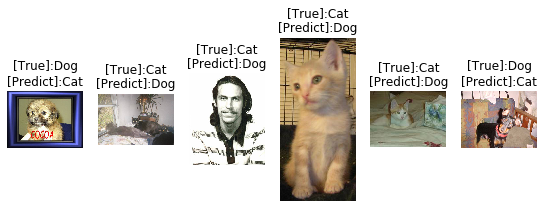

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ps, xs, ys = get_images(x_test, y_test, 100)

accu = model.evaluate(xs, ys)[1]
print("命中率：", accu * 100, "%")

# If we use model instead of Sequential, there is no predict_classes
# we need to use predict + argmax
pre = model.predict(xs).argmax(axis = 1)


x_test_1 = np.array(list(map(lambda p:np.array(load_img(p)), ps)))
idx = np.nonzero(pre != ys)[0]
pre_false_img = x_test_1[idx]
pre_false_label = ys[idx]
pre_false_pre = pre[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(16, 32))

trans = ["Cat", "Dog"]
z = zip(pre_false_img, pre_false_label, pre_false_pre)
# (i, (z1, z2, z3))
for i, (img, label, p) in enumerate(z):
    plt.subplot(height, width, i+1)
    plt.title("[T]:{}\n[P]:{}".format(trans[label], trans[p]))
    plt.axis("off")
    plt.imshow(img)